Introduction to Data Science: Assignment 3
By Marissa Beaty

In [1]:
import random, os, sys, shutil
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Section 1

In [2]:
#Upload the data
sleep_df = pd.read_csv("Assignment_3_Dataset_Sleep_Efficiency.csv")

In [3]:
#looking at the columns listed in the data
sleep_df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [6]:
sleep_df[:10]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,Yes,3.0
8,9,41,Female,2021-04-05 02:30:00,2021-04-05 08:30:00,6.0,0.79,28,55,17,3.0,50.0,0.0,No,1.0
9,10,11,Female,2021-09-16 01:00:00,2021-09-16 10:00:00,9.0,0.55,18,37,45,4.0,0.0,0.0,No,0.0


In [7]:
sleep_df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [8]:
#seeing if there are any NaN values in the dataset
sleep_df.isna().any()

ID                        False
Age                       False
Gender                    False
Bedtime                   False
Wakeup time               False
Sleep duration            False
Sleep efficiency          False
REM sleep percentage      False
Deep sleep percentage     False
Light sleep percentage    False
Awakenings                 True
Caffeine consumption       True
Alcohol consumption        True
Smoking status            False
Exercise frequency         True
dtype: bool

Section 2

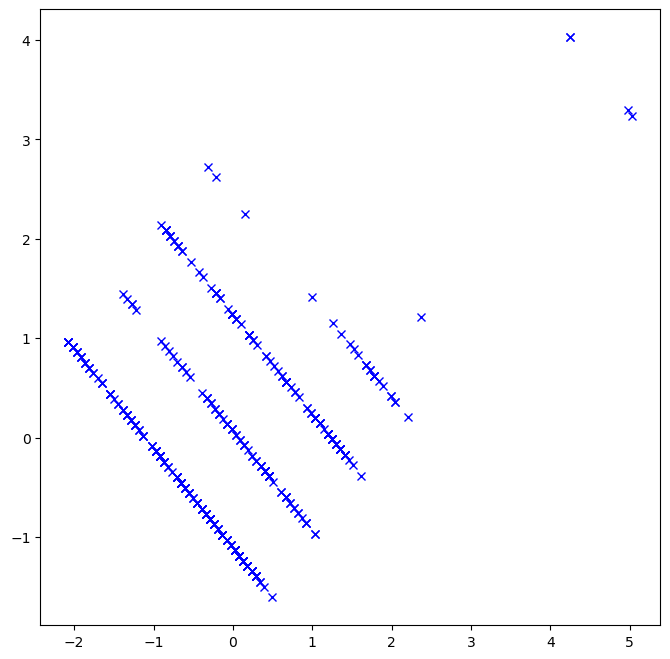

In [9]:
#picking some variables to work with
sleep_efficiency = sleep_df["Sleep efficiency"]
caffeine_intake = sleep_df["Caffeine consumption"]

#getting a smaller dataset
vplot = sleep_df[["Sleep efficiency", "Caffeine consumption"]]
vplot = vplot.dropna()

#standardizing the data 
vplot = StandardScaler().fit_transform(vplot)

#get reduced dimensions
pca = PCA(n_components=2)
vplot_2d = pca.fit_transform(vplot)

#visualize it as a 2D plot
plt.figure(figsize=(8, 8))
a = plt.plot(vplot_2d[:,0],vplot_2d[:,1],"bx")

Does there appear to be clear groups? 

Looking at the dataset, we can see five clear distinct diagonal lines that appear to be separate groups. One group, in the top right corner of the graph, appear to be outliers as they are distinctly separated from the rest of the data points. There are also several gaps within the diagonal lines that could also be signalling a separate cluster. 

Section 3

In [10]:
import random, os, sys, shutil
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [11]:
#run clustering and visualize results

#finding a good BIC score to determine the best model parameters
def gmm_bic_score(estimator, X):
    return -estimator.bic(X)

#using GridSearchCV to find the optimal parameter values
param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(GaussianMixture(), param_grid = param_grid, scoring = gmm_bic_score)

grid_search.fit(vplot)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x2824d8550>)

In [12]:
#finding the BIC scores with my data and determining the best clustering approach
bic_scores = pd.DataFrame(grid_search.cv_results_)[[
    "param_n_components", "param_covariance_type", "mean_test_score"]]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
    "param_n_components": "Number of components",
    "param_covariance_type": "Type of covariance",
    "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

   Number of components Type of covariance   BIC score
15                    4               diag -112.211962
22                    5               full  -58.263091
21                    4               full  -41.652971
23                    6               full  -40.064143
20                    3               full   23.577850


In [13]:
k = bic_score.iloc[0,0]
cov_type = bic_score.iloc[0,1]

In [14]:
#cluster and plot
def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components = 2)
    vplot_2d = pca.fit_transform(X)
    plt.scatter(vplot_2d[:, 0], vplot_2d[:, 1], c=labels, alpha=0.3)

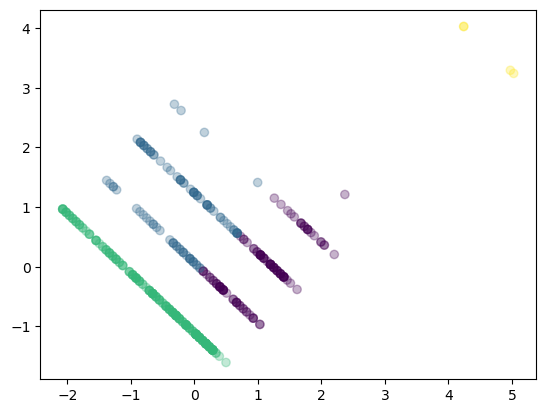

In [15]:
#running the Gaussian Mixture
gmm = GaussianMixture(n_components=k, covariance_type=cov_type, random_state=42)
gmm = gmm.fit(vplot)
plot_clusters(gmm, vplot)

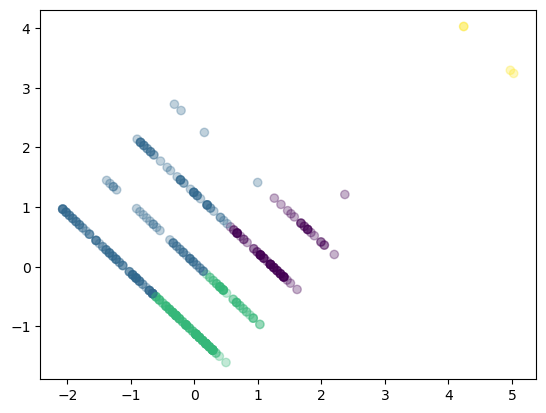

In [17]:
#reducing dimensions
num_dimensions = 2

pca = PCA(n_components=num_dimensions)
vplot_less_dimensions = pca.fit_transform(vplot)

gmm = GaussianMixture(n_components=4, covariance_type='diag', random_state=42)
gmm = gmm.fit(vplot_less_dimensions)
plot_clusters(gmm, vplot_less_dimensions)

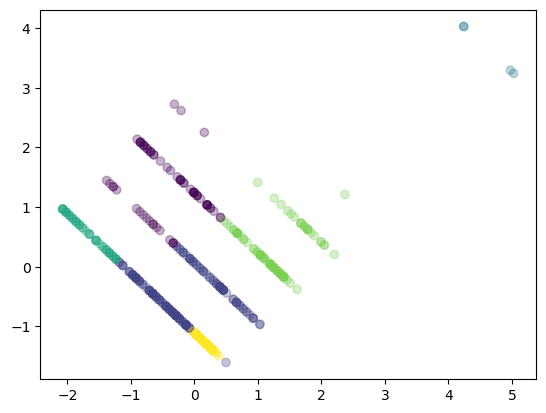

In [18]:
#try different values of k
gmm_updated_k = GaussianMixture(n_components=6, covariance_type='diag', random_state=41)
gmm_updated_k = gmm_updated_k.fit(vplot_less_dimensions)
plot_clusters(gmm_updated_k, vplot_less_dimensions)

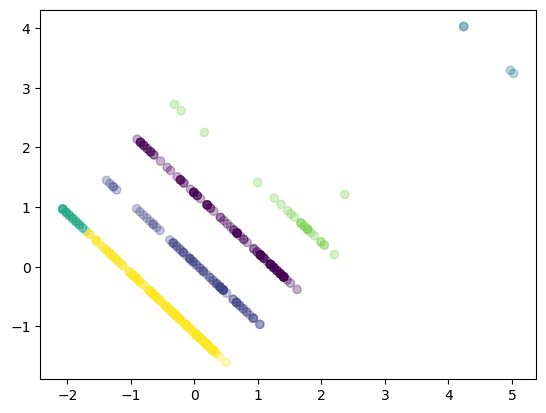

In [19]:
#Running gaussian Mixture on the new value of K
gmm_updated_k = GaussianMixture(n_components=6, covariance_type='full', random_state=41)
gmm_updated_k = gmm_updated_k.fit(vplot_less_dimensions)
plot_clusters(gmm_updated_k, vplot_less_dimensions)

   Number of components Type of covariance   BIC score
23                    6               full  144.880305
17                    6               diag  245.316899
22                    5               full  323.391521
16                    5               diag  367.928418
14                    3               diag  458.025453


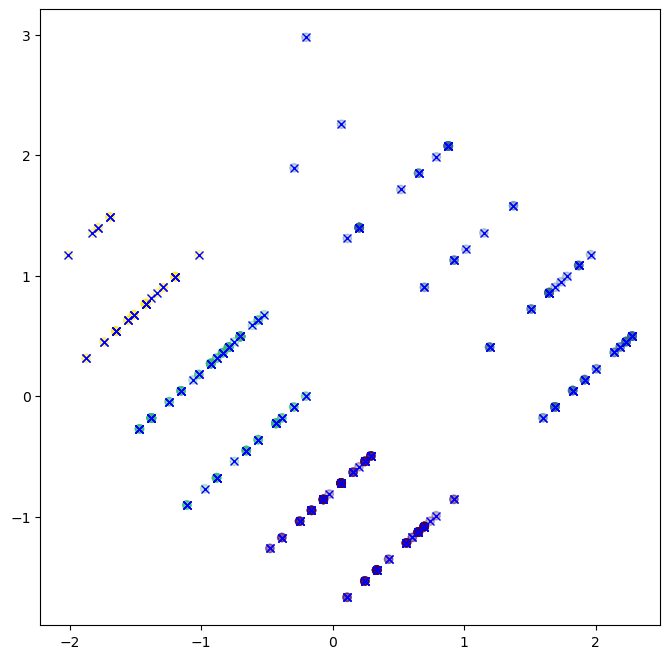

In [20]:
#try differnt features (dif. columns in your dataset)
vplot2 = sleep_df[['Deep sleep percentage', 'Exercise frequency']]
vplot2 = vplot2.dropna()

vplot2 = StandardScaler().fit_transform(vplot2)

pca = PCA(n_components=2)
vplot2_2d = pca.fit_transform(vplot2)

plt.figure(figsize=(8, 8))
a = plt.plot(vplot2_2d[:,0],vplot2_2d[:,1],"bx")

grid_search.fit(vplot2)
bic_scores = pd.DataFrame(grid_search.cv_results_)[[
    "param_n_components", "param_covariance_type", "mean_test_score"]]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
    "param_n_components": "Number of components",
    "param_covariance_type": "Type of covariance",
    "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components = 2)
    vplot2_2d = pca.fit_transform(X)
    plt.scatter(vplot2_2d[:, 0], vplot2_2d[:, 1], c=labels, alpha=0.3)

gmm = gmm.fit(vplot2)
plot_clusters(gmm, vplot2)


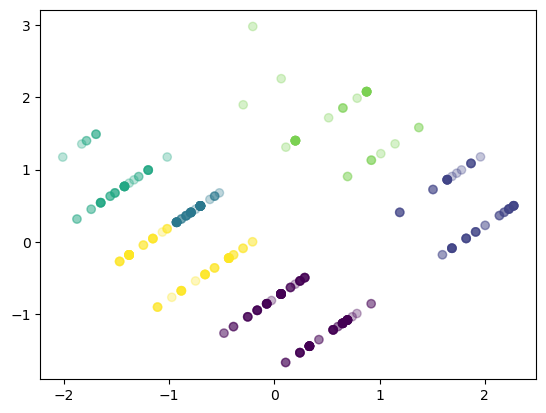

In [21]:
#running Gaussian Mixture on the different dataset/parameters
num_dimensions = 2

pca = PCA(n_components=num_dimensions)
vplot2_less_dimensions = pca.fit_transform(vplot2)

gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
gmm = gmm.fit(vplot2_less_dimensions)
plot_clusters(gmm, vplot2_less_dimensions)

In [ ]:
sleep_df_pca = sleep_df.drop(['Gender','Bedtime', 'Wakeup time', 'Smoking status'], axis = 1)

   Number of components Type of covariance    BIC score
7                     2               tied  1536.777518
8                     3               tied  1584.205434
6                     1               tied  1623.034302
18                    1               full  1623.034302
10                    5               tied  1675.337368


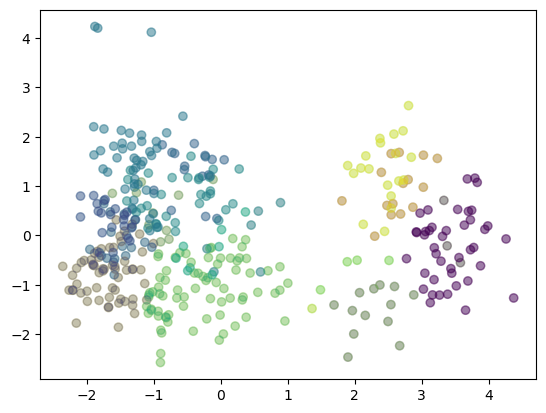

In [24]:
#run PCA first, then cluster the principal components as opposed to the original features
smaller_sleep_df = sleep_df.drop(['Gender','Bedtime', 'Wakeup time', 'Smoking status'], axis = 1)
smaller_sleep_df = smaller_sleep_df.dropna()

#standardizing the data 
smaller_sleep_df = StandardScaler().fit_transform(smaller_sleep_df)

#get reduced dimensions
pca = PCA(n_components=2)
vplot_2d = pca.fit_transform(vplot)

grid_search.fit(smaller_sleep_df)
bic_scores = pd.DataFrame(grid_search.cv_results_)[[
    "param_n_components", "param_covariance_type", "mean_test_score"]]
bic_scores["mean_test_score"] = -bic_scores["mean_test_score"]
bic_scores = bic_scores.rename(
    columns={
    "param_n_components": "Number of components",
    "param_covariance_type": "Type of covariance",
    "mean_test_score": "BIC score",
    }
)
bic_score = bic_scores.sort_values(by="BIC score").head()
print(bic_score)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components = 2)
    sleep_df_pca = pca.fit_transform(X)
    plt.scatter(sleep_df_pca[:, 0], sleep_df_pca[:, 1], c=labels, alpha=0.3)

gmm = gmm.fit(smaller_sleep_df)
plot_clusters(gmm, smaller_sleep_df)

num_dimensions = 2

pca = PCA(n_components=num_dimensions)
smaller_sleep_less_dimensions = pca.fit_transform(smaller_sleep_df)

gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
gmm = gmm.fit(smaller_sleep_less_dimensions)
plot_clusters(gmm, smaller_sleep_less_dimensions)

Which provides the best clusters? How did you reach this conclusion? 

Based on the many tests above, the best cluster was provided by having 4 components and a diagonal covariance type on the Sleep Efficiency verse Caffeine Consumption dataset. I reached this conclusion specifically by looking at the BIC scores. Though the several tests yielded similar clusters, the BIC score was lowest with the above combination. 

Section 4

Invesitage the examples in your clusters, do they seem to have coherent differences? If the clusters have no patterns, can you think why this might be? Consider your data and its representation/features?

If you review the graphs shown above in Sections 1 and 2, where Sleep Efficiency is compared to Caffeine Consumption, the clusters do appear to have patterns. As theorized above, there is a separation between the clusters following an upward linear slope as well as the clusters separated by spaces. What is interesting about the clusters separated by the linear slope is that the values above and below are of similar or equal quantities of sleep efficiency despite having varying degrees of caffeine consumption. When looking at our plot below graphing this relationship, this theory is reconfirmed. Despite varying degrees of caffeine consumption, sleep efficiency remains quite stagnant. For example, those reporting 60% sleep efficiency have varying caffeine consumption from 0mg to 75mg. More so, those outliers with caffeine consumptions around 200mg reported sleep efficiency between 80 and 98 percent. 

From looking at our clusters they have grouped those with low sleep efficiency and low caffeine consumption, low sleep efficiency with high caffeine consumption, and so on. This makes complete sense given our data and the description I have provided above. For this, we can conclude the model successfully clustered the data. 


The Maximum Sleep Efficiency in our Dataset is:  0.99
The Minimum Sleep Efficiency in our Dataset is:  0.5
The Median Sleep Efficiency in our Dataset is:  0.82
The Maximum Caffeine Intake in our Dataset is:  200.0
The Minimum Caffeine Intake in our Dataset is:  0.0
The Median Caffeine Intake in our Dataset is:  25.0


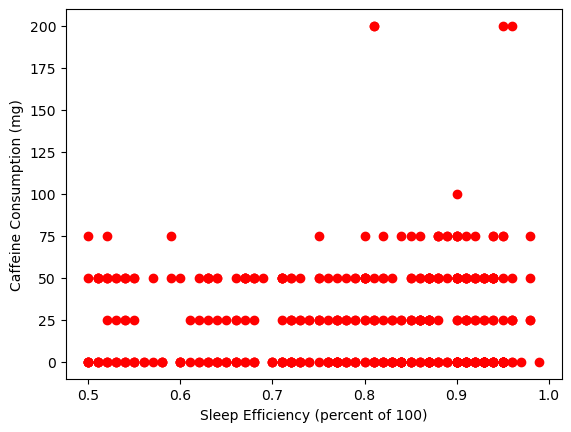

In [23]:
#think about examining representative examples
sleep_efficiency = sleep_df["Sleep efficiency"]
caffeine_intake = sleep_df["Caffeine consumption"]

#plot the data without transforming it
plt.plot(sleep_efficiency, caffeine_intake, "ro")
plt.xlabel("Sleep Efficiency (percent of 100)")
plt.ylabel("Caffeine Consumption (mg)")

max_sleep_efficiency = sleep_efficiency.max()
min_sleep_efficiency = sleep_efficiency.min()
median_sleep_efficiency = sleep_efficiency.median()
max_caffeine = caffeine_intake.max()
min_caffeine = caffeine_intake.min()
median_caffeine = caffeine_intake.median()

print("The Maximum Sleep Efficiency in our Dataset is: ", max_sleep_efficiency)
print("The Minimum Sleep Efficiency in our Dataset is: ", min_sleep_efficiency)
print("The Median Sleep Efficiency in our Dataset is: ", median_sleep_efficiency)
print("The Maximum Caffeine Intake in our Dataset is: ", max_caffeine)
print("The Minimum Caffeine Intake in our Dataset is: ", min_caffeine)
print("The Median Caffeine Intake in our Dataset is: ", median_caffeine)



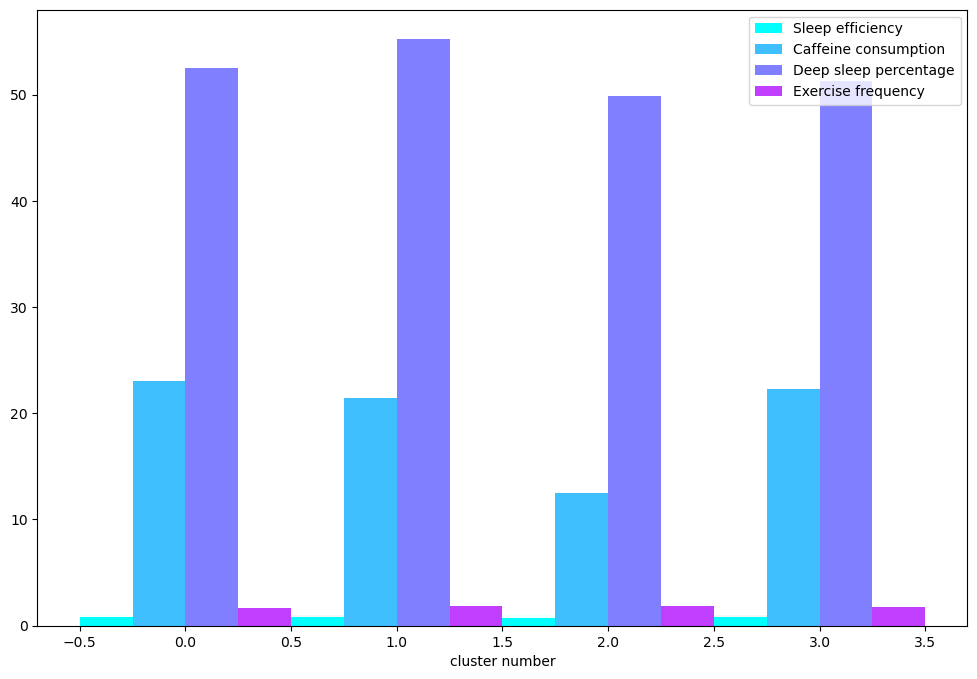

In [32]:
#plotting selections of the features used above within each cluster

labels = gmm.predict(vplot_less_dimensions)
sleep_df["cluster"] = pd.Series(labels)

features = ["Sleep efficiency", "Caffeine consumption", "Deep sleep percentage", "Exercise frequency"]
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12,8))

for i in range(k):
    ax.bar([i],[1], width=width*4, color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap("cool")

for index, f in enumerate(features):
    data = [np.mean(sleep_df[sleep_df["cluster"]==i][f]) for i in range(k)]

    sleep_df_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2

    ax.bar(sleep_df_vals, data, width=width, label=f, color=cmap(index/len(features)))

    ax.legend()
    ax.set_xlabel("cluster number")